# sklearn数据预处理（特征工程）

数据挖掘，就是从数据中学习到规律，再利用学习到的规律对未知的数据进行预测。但是最开始获取的数据其中绝大多数是“脏”的，不利于后期进行分析。因此，在分析前需要进行数据预处理。sklearn.preprocessing包提供了几个常用的函数和转换类，可用来将原始的特征向量转化为一个更适于数据分析的表示形式。一般来说，学习算法收益于数据集的标准形式。如果数据中存在异常点，稳健的数据规范或转换是更适合的。

## 1. 数据（特征）标准化

### 任务描述

利用sklearn对数据进行标准化

### 相关知识

为了完成本任务，需要掌握：

1. 为什么要进行标准化
2. Z-score标准化
3. Min-max标准化
4. MaxAbs标准化。

#### 为什么要进行标准化

对于大多数数据挖掘算法来说，数据集的标准化是基本要求。这是因为，如果特征不服从或者近似服从标准正态分布（即，零均值、单位标准差的正态分布）的话，算法的表现会大打折扣。实际上，我们经常忽略数据的分布形状，而仅仅做零均值、单位标准差的处理。在一个机器学习算法的目标函数里的很多元素所有特征都近似零均值，方差具有相同的阶。如果某个特征的方差的数量级大于其它的特征，那么，这个特征可能在目标函数中占主导地位，这使得模型不能从其它特征有效地学习。

#### Z-score标准化
这种方法基于原始数据的均值mean和标准差standard deviation进行数据的标准化。将特征A的原始值x使用z-score标准化到x’。z-score标准化方法适用于特征A的最大值和最小值未知的情况，或有超出取值范围的离群数据的情况。将数据按其特征(按列进行)减去其均值，然后除以其方差。最后得到的结果是，对每个特征/每列来说所有数据都聚集在0附近，方差值为1。数学公式如下：

$$
x' = \frac{x - mean(x)}{std(x)}
$$

函数scale为数组形状的数据集的标准化提供了一个快捷实现：

In [2]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

经过缩放后的数据具有零均值以及标准方差:

In [3]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [4]:
X_scaled.std(axis=0)

array([1., 1., 1.])

#### min-max标准化

min-max标准化方法是对原始数据进行线性变换。设min和max分别为特征x的最小值和最大值，将的一个原始值x通过min-max标准化映射成在区间`[0,1]`中的值x'，其公式为：

$$
x' = \frac{x - min(x)}{max(x) - min(x)}
$$

可以使用sklearn的MinMaxScaler实现min-max标准化，以下是一个将简单的数据矩阵缩放到`[0, 1]`的例子:

In [6]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

#### MaxAbs标准化

MaxAbs的工作原理与Min-max非常相似，但是它只通过除以每个特征的最大值将训练数据特征缩放至`[-1, 1]`范围内，这就意味着，训练数据应该是已经零中心化或者是稀疏数据。公式如下：

$$
x' = \frac{x}{max(x)}
$$


可以使用sklearn的MaxAbsScale实现MaxAbs标准化，以下是使用上例中数据运用这个缩放器的例子:

In [7]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

### 实操练习

#### 编程要求

在下列框架代码的Begin-End处补充Python代码，实现数据标准化方法。

#### 测试说明

测试输入：

In [8]:
X = np.array([[1, 2, 1],[2, 4, 2], [4, 8, 4]])

预期输出：
```
z-score:
 [[-1.06904497 -1.06904497 -1.06904497]
 [-0.26726124 -0.26726124 -0.26726124]
 [ 1.33630621  1.33630621  1.33630621]]
min-max:
 [[0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333]
 [1.         1.         1.        ]]
max-abs:
 [[0.25 0.25 0.25]
 [0.5  0.5  0.5 ]
 [1.   1.   1.  ]]
```

In [13]:
from sklearn.preprocessing import scale, MaxAbsScaler, MinMaxScaler

#实现数据预处理方法
def preprocess(X,y):
    '''
    x(ndarray):处理 数据
    y(str):y等于'z_score'使用z_score方法
           y等于'minmax'使用MinMaxScaler方法
           y等于'maxabs'使用MaxAbsScaler方法
    '''
    #********* Begin *********#
    if y == 'z_score':
        return scale(X)
    if y == 'minmax':
        return MinMaxScaler().fit_transform(X)
    if y == 'maxabs':
        return MaxAbsScaler().fit_transform(X)
    #********* End *********#
    
print('z-score:\n',preprocess(X, 'z_score'))
print('min-max:\n',preprocess(X, 'minmax'))
print('max-abs:\n',preprocess(X, 'maxabs'))

z-score:
 [[-1.06904497 -1.06904497 -1.06904497]
 [-0.26726124 -0.26726124 -0.26726124]
 [ 1.33630621  1.33630621  1.33630621]]
min-max:
 [[0.         0.         0.        ]
 [0.33333333 0.33333333 0.33333333]
 [1.         1.         1.        ]]
max-abs:
 [[0.25 0.25 0.25]
 [0.5  0.5  0.5 ]
 [1.   1.   1.  ]]


## 2.非线性转换

### 任务描述

利用sklearn对数据进行非线性转换。

### 相关知识

为了完成本任务，需要掌握：

1. 为什么要非线性转换
2. 映射到均匀分布
3. 映射到高斯分布

#### 为什么要非线性转换

对于大多数数据挖掘算法来说，如果特征不服从或者近似服从标准正态分布（即，零均值、单位标准差的正态分布）的话，算法的表现会大打折扣。非线性转换就是将特征映射到均匀分布或者高斯分布(即正态分布)。

#### 映射到均匀分布

相比线性缩放，该方法不受异常值影响，它将数据映射到了零到一的均匀分布上，将最大的数映射为1，最小的数映射为0。其它的数按从小到大的顺序均匀分布在0到1之间，如有相同的数则取平均值，如数据为`np.array([[1],[2],[3],[4],[5]])`则经过转换为：`np.array([[0],[0.25],[0.5],[0.75],[1]])`，数据为`np.array([[1],[2],[9],[10],[2]])`则经过转换为：`np.array([[0],[0.375],[0.75],[1.0],[0.375]])`。

第二个例子具体过程如下图：

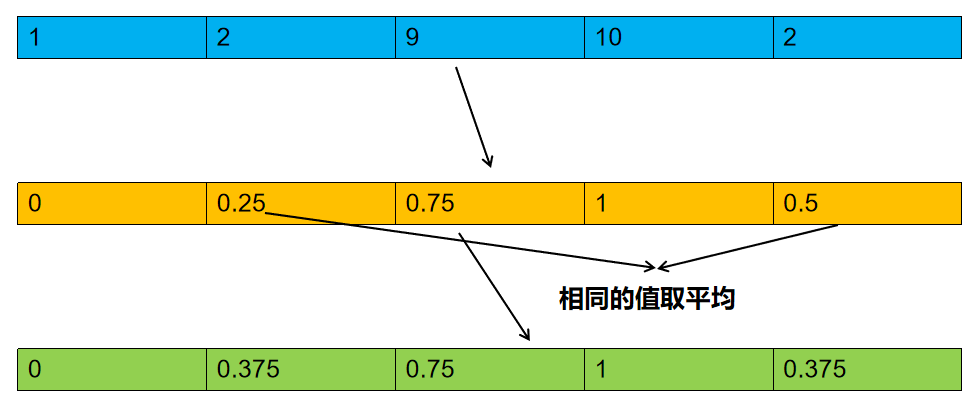

在sklearn中使用QuantileTransformer方法实现，用法如下：

In [15]:
from sklearn.preprocessing import QuantileTransformer
import numpy as np

data = np.array([[1],[2],[3],[4],[5]])
quantile_transformer = QuantileTransformer(random_state=666, n_quantiles=3)
data = quantile_transformer.fit_transform(data)
data

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

#### 映射到高斯分布

映射到高斯分布是为了稳定方差，并最小化偏差。在最新版sklearn中PowerTransformer有两种映射方法:

- Yeo-Johnson映射，公式如下：
$$
x_i^{(\lambda)} = \begin{cases}
[(x_i+1)^{\lambda} - 1], if  \lambda \neq 0, x_i \geq 0 \\
ln(x_i)+1, if \lambda = 0, x_i \geq 0 \\
-[(-x_i+1]^{2-\lambda} - 1/(2-\lambda), if \lambda \neq 2, x_i \lt 0 \\
-ln(-x_i+1), if \lambda = 2, x_i \lt 0
\end{cases}
$$

- Box-Cox映射，公式如下：
$$
x_i^(\lambda) = \begin{cases} 
\frac{x_i^{\lambda} - 1}, if \lambda \neq 0 \\
\ln(x_i+1), if \lambda = 2, x_i \lt 0
\end{cases}
$$

在sklearn中使用PowerTransformer方法实现，用法如下：

In [16]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
data = np.array([[1],[2],[3],[4],[5]])
pt = PowerTransformer(method='box-cox', standardize=False)
data = pt.fit_transform(data)
data

array([[0.        ],
       [0.88891532],
       [1.64391667],
       [2.32328259],
       [2.95143046]])

通过对sklearn的QuantileTransformer设置参数output_distribution='normal'实现映射高斯分布，用法如下：

In [18]:
from sklearn.preprocessing import QuantileTransformer
import numpy as np
data = np.array([[1],[2],[3],[4],[5]])
quantile_transformer = QuantileTransformer(
    output_distribution='normal',
    random_state=666,
    n_quantiles=3
)
data = quantile_transformer.fit_transform(data)
data = np.around(data, decimals=3)
data

array([[-5.199],
       [-0.674],
       [ 0.   ],
       [ 0.674],
       [ 5.199]])

### 实操练习

#### 编程要求

根据提升，在下列框架代码的Begin-End处补充Python代码，实现数据的非线性转换。

#### 测试说明

测试输入：

In [19]:
input_data = np.array([[1],[2],[3],[4],[5]])

预期输出：
```
映射到均匀分布：
 [[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]
映射到高斯分布：
 [[-5.19933758]
 [-0.67448975]
 [ 0.        ]
 [ 0.67448975]
 [ 5.19933758]]
```

In [22]:
from sklearn.preprocessing import QuantileTransformer

#实现非线性转换方法
def non_linear_transform(x,y):
    '''
    x(ndarray):待处理数据
    y(int):y等于0映射到均匀分布
           y等于1映射到高斯分布
    '''
    #********* Begin *********#
    if y == 0:
        transformer = QuantileTransformer(random_state=666, n_quantiles=3)
        x = transformer.fit_transform(x)
        return x
    if y == 1:
        transformer = QuantileTransformer(output_distribution='normal',random_state=666, n_quantiles=3)
        x = transformer.fit_transform(x)
        return x
    #********* End *********#

print('映射到均匀分布：\n', non_linear_transform(input_data, 0))
print('映射到高斯分布：\n', non_linear_transform(input_data, 1))

映射到均匀分布：
 [[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]
映射到高斯分布：
 [[-5.19933758]
 [-0.67448975]
 [ 0.        ]
 [ 0.67448975]
 [ 5.19933758]]


## 3.（样本）归一化

### 任务描述

利用sklearn对数据进行归一化。

### 相关知识

为了完成本任务，需要掌握：

1. 为什么使用归一化
2. L1范式归一化
3. L2范式归一化。

#### 为什么使用归一化

**归一化**是**缩放单个样本**以具有**单位范数**的过程。归一化实质是一种线性变换，线性变换有很多良好的性质，这些性质决定了对数据改变后不会造成“失效”，反而能提高数据的表现，这些性质是归一化的前提。归一化能够加快模型训练速度，**统一特征量纲，避免数值太大**。值得注意的是，**归一化**是对每一个样本做转换，所以是**对数据的每一行进行变换**。而之前的**标准化**方法是**对数据的每一列做变换**。

#### L1范式归一化

L1范式定义如下：

$$
||x||_1 = \sum_{i=1}^n {|x_i|}
$$

即向量（行，样本）x中每个元素（列，特征）的绝对值之和。

**L1范式归一化**就是将样本中**每个特征除以特征的L1范式**。

在sklearn中使用normalize方法实现，用法如下：

In [23]:
from sklearn.preprocessing import normalize
data = np.array([[-1,0,1],
                 [1,0,1],
                 [1,2,3]])
data = normalize(data,'l1')
data

array([[-0.5       ,  0.        ,  0.5       ],
       [ 0.5       ,  0.        ,  0.5       ],
       [ 0.16666667,  0.33333333,  0.5       ]])

#### L2范式归一化

L2范式定义如下：

$$
||x||_2 = \sqrt{\sum_{x=1}^n{x_i^2}}
$$
即向量（行，样本）x中每个元素的平方和再开平方根。

**L2范式归一化**就是将样本中**每个特征除以特征的L2范式**。

在sklearn中使用normalize方法实现，用法如下：

In [24]:
from sklearn.preprocessing import normalize
data = np.array([[-1,0,1],
                 [1,0,1],
                 [1,2,3]])
data = normalize(data,'l2')
data

array([[-0.70710678,  0.        ,  0.70710678],
       [ 0.70710678,  0.        ,  0.70710678],
       [ 0.26726124,  0.53452248,  0.80178373]])

### 实操练习

#### 编程要求

根据提升，在下列框架代码的Begin-End处补充Python代码，实现数据的归一化。

#### 测试说明

测试输入：

In [25]:
input_data = np.array([[-1, 0, 1],[1, 0, 1],[1, 2, 3]])

预期输出：
```
L1归一化：
 [[-0.5         0.          0.5       ]
 [ 0.5         0.          0.5       ]
 [ 0.16666667  0.33333333  0.5       ]]
L2归一化：
 [[-0.70710678  0.          0.70710678]
 [ 0.70710678  0.          0.70710678]
 [ 0.26726124  0.53452248  0.80178373]]
```

In [28]:
from sklearn.preprocessing import normalize
#实现数据归一化
def normalize_test(x,y):
    '''
    x(ndarray):待处理数据
    y(int):y等于1则使用l1归一化
           y等于2则使用l2归一化
    '''
    #********* Begin *********#
    if y == 1:
        x = normalize(x,norm='l1')
        return x
    if y == 2:
        x = normalize(x,norm='l2')
        return x
    #********* End *********#

print('L1归一化：\n', normalize_test(input_data, 1))
print('L2归一化：\n', normalize_test(input_data, 2))

L1归一化：
 [[-0.5         0.          0.5       ]
 [ 0.5         0.          0.5       ]
 [ 0.16666667  0.33333333  0.5       ]]
L2归一化：
 [[-0.70710678  0.          0.70710678]
 [ 0.70710678  0.          0.70710678]
 [ 0.26726124  0.53452248  0.80178373]]


## 4.离散值编码

### 任务描述

利用sklearn对标签（Label）进行标签编码和独热（OneHot）编码

### 相关知识

为了完成本任务，需要掌握：

1. 标签编码器：LabelEncoder
2. 独热编码器：OneHotEncoder

#### 标签编码器：LabelEncoder

在数据挖掘中，特征经常不是数值型的而是分类型的。举个例子，一个人可能有`["male", "female"]`，`["from Europe", "from US", "from Asia"]`，`["uses Firefox", "uses Chrome", "uses Safari", "uses Internet Explorer"]`等分类的特征。这些特征能够被有效地编码成整数，比如`["male", "from US", "uses Internet Explorer"]`可以被表示为`[0, 1, 3]`，`["female", "from Asia", "uses Chrome"]`表示为`[1, 2, 1]`。

在sklearn中，通过LabelEncoder来实现：

In [29]:
from sklearn.preprocessing import LabelEncoder

label = ['male','female']
int_label = LabelEncoder()
label = int_label.fit_transform(label)
label

array([1, 0])

#### 独热编码器：OneHotEncoder

这种整数特征表示并不能在sklearn的估计器中直接使用，因为这样的连续输入，估计器会认为类别之间是有序的，但实际却是无序的。如将male,female，转换为1,0。1比0要大，机器就会把这个关系考虑进去，而male,female之间是没有这样的关系的。因此，需要使用另外一种编码方式，即OneHot编码。

在sklearn中通过OneHotEncoder来实现，使用方法如下：

In [32]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
label = np.array([1,0])
#先将X组织成（sample，feature）的格式
label = np.array(label).reshape(-1, 1)
onehot_label = OneHotEncoder()
label = onehot_label.fit_transform(label).toarray()
label

array([[0., 1.],
       [1., 0.]])

### 实操练习

#### 编程要求

根据提示，在下列框架代码的Begin-End处补充Python代码，实现OneHot编码。

#### 测试说明

测试输入：

In [42]:
labels = ['红', '绿', '蓝']

预期输出：

```
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
```

In [43]:
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

def onehot_labels(labels):
    '''
    input:label(list):待处理标签
    output:lable(ndarray):onehot处理后的标签
    '''
    #********* Begin *********#
    int_label = LabelEncoder()
    labels = int_label.fit_transform(labels)
    #先将X组织成（sample，feature）的格式
    labels = np.array(labels).reshape(-1, 1)
    onehot_encoder = OneHotEncoder()
    labels = onehot_encoder.fit_transform(labels).toarray()
    return labels
    #********* End *********#
print(onehot_labels(labels))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


#### 操作解析

In [54]:
encoded_labels = LabelEncoder().fit_transform(labels)
print(labels, '-->', encoded_labels)

['红', '绿', '蓝'] --> [0 1 2]


In [55]:
encoded_labels = np.array(encoded_labels)
print(labels, '-->', encoded_labels)

['红', '绿', '蓝'] --> [0 1 2]


In [57]:
encoded_labels = encoded_labels.reshape(-1, 1)
print(labels, '-->\n', encoded_labels)

['红', '绿', '蓝'] -->
 [[0]
 [1]
 [2]]


In [58]:
onehot_labels = OneHotEncoder().fit_transform(encoded_labels)
print(labels, '-->\n', onehot_labels.toarray())

['红', '绿', '蓝'] -->
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## 5.生成多项式特征

### 任务描述

利用sklearn生成多项式特征。

### 相关知识

为了完成本任务，你需要掌握：

1. 为什么需要多项式特征
2. PolynomialFeatures

#### 为什么需要多项式特征

在数据挖掘中，获取数据的代价经常是非常高昂的。因此有时就需要人为的制造一些特征，并且有的特征之间是有关联的。生成多项式特征可以轻松地为我们获取更多的数据，并获得特征的更高维度和相互间关系的项，且引入了特征之间的非线性关系，可以有效的**增加模型的复杂度**。

##### 多项式特征：PolynomialFeatures

在sklearn中通过PolynomialFeatures方法来生成多项式特征，使用方法如下：

In [59]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

data = np.arange(6).reshape(3, 2)
# 生成二项式特征
poly = PolynomialFeatures(2)
data = poly.fit_transform(data)
data

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

特征转换情况为：$(x_1,x_2)$ --> $(1,x_1,x_2,x_1^2,x_1x_2,x_2^2)$

在一些情况下，只需要特征间的交互项，这可以通过设置 interaction_only=True来得到:

In [60]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

data = np.arange(6).reshape(3, 2)
# degree=n表示生成n项式特征，只需要特征之间交互
poly = PolynomialFeatures(degree=2, interaction_only=True)
data = poly.fit_transform(data)
data

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

特征转换情况为：$(x_1,x_2)$ --> $(1,x_1,x_2,x_1x_2)$

### 实操练习

#### 编程要求

根据提示，在下列框架代码的Begin-End处补充Python代码，生成多项式特征。

#### 测试说明

测试输入：

In [62]:
input_data = np.arange(1,7).reshape(3, 2)
input_data

array([[1, 2],
       [3, 4],
       [5, 6]])

预期输出：

```
二项式特征：
 [[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]
 [ 1.  5.  6. 25. 30. 36.]]
交互式二项式特征
 [[ 1.  1.  2.  2.]
 [ 1.  3.  4. 12.]
 [ 1.  5.  6. 30.]]
```

In [64]:
from sklearn.preprocessing import PolynomialFeatures

def poly_features(x,y):
    '''
    x(ndarray):待处理特征
    y(int):y等于0生成二项式特征
           y等于1生成二项式特征，只需要特征之间交互
    '''
    #********* Begin *********#
    poly = None
    if y == 0:
        poly = PolynomialFeatures(2)
    elif y == 1:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
    return poly.fit_transform(x)  
    #********* End *********#
    
print('二项式特征：\n',poly_features(input_data, 0))
print('交互式二项式特征\n',poly_features(input_data, 1))

二项式特征：
 [[ 1.  1.  2.  1.  2.  4.]
 [ 1.  3.  4.  9. 12. 16.]
 [ 1.  5.  6. 25. 30. 36.]]
交互式二项式特征
 [[ 1.  1.  2.  2.]
 [ 1.  3.  4. 12.]
 [ 1.  5.  6. 30.]]


## 6.估算缺失值

### 任务描述

利用sklearn对数据估算缺失值。

### 相关知识

为了完成本任务，需要掌握：

1. 为什么要估算缺失值
2. 估算器：Imputer

#### 为什么要估算缺失值

由于各种原因，真实世界中的许多数据集都包含缺失数据，这类数据经常被编码成空格、NaNs，或者是其他的占位符。但是这样的数据集并不能被sklearn学习算法兼容，因为大多的学习算法都默认假设数组中的元素都是数值，因而所有的元素都有自己的意义。 使用不完整的数据集的一个基本策略就是舍弃掉整行或整列包含缺失值的数据。但是这样就付出了舍弃可能有价值数据（即使是不完整的 ）的代价。 处理缺失数值的一个更好的策略就是从已有的数据推断出缺失的数值。

#### 估算器：Imputer

sklearn中使用Imputer方法估算缺失值，使用方法如下：

In [71]:
from sklearn.impute import SimpleImputer

data = [[np.nan, 2], [6, np.nan], [7, 4],[np.nan,4]]
#缺失值为nan，沿着每一列，使用平均值来代替缺失值
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data_imp = imp.fit_transform(data)
print(data, '-->\n', data_imp)

[[nan, 2], [6, nan], [7, 4], [nan, 4]] -->
 [[6.5        2.        ]
 [6.         3.33333333]
 [7.         4.        ]
 [6.5        4.        ]]


其中strategy参数用来选择代替缺失值方法：

`mean`表示使用平均值代替缺失值
`median`表示使用中位数代替缺失值
`most_frequent`表示使用出现频率最多的值代替缺失值

missing_values参数表示何为缺失值：

`NaN`表示`np.nan`为缺失值
`0`表示`0`为缺失值

### 实操练习

#### 编程要求

根据提示，在下列框架代码的Begin-End处补充Python代码，对缺失值进行估算。

#### 测试说明

测试输入：

In [72]:
input_data = [[np.nan, 2], [6, np.nan], [7, 4],[np.nan,4]]
input_data

[[nan, 2], [6, nan], [7, 4], [nan, 4]]

期望输出：

```
平均值估算缺失值：
 [[6.5        2.        ]
 [6.         3.33333333]
 [7.         4.        ]
 [6.5        4.        ]]
中位数估算缺失值：
 [[6.5 2. ]
 [6.  4. ]
 [7.  4. ]
 [6.5 4. ]]
最频繁估算缺失值：
 [[6. 2.]
 [6. 4.]
 [7. 4.]
 [6. 4.]]
```

In [76]:
from sklearn.impute import SimpleImputer

def impute(x,y):
    '''
    x(ndarray):待处理数据
    y(str):y为'mean'则用取平均方式补充缺失值
           y为'median'则用取中位数方式补充缺失值
           y为'most_frequent'则用出现频率最多的值代替缺失值        
    '''
    #********* Begin *********#
    imp = SimpleImputer(missing_values=np.nan, strategy=y)
    return imp.fit_transform(x)
    #********* End *********#
    
print('平均值估算缺失值：\n', impute(input_data, 'mean'))
print('中位数估算缺失值：\n', impute(input_data, 'median'))
print('最频繁估算缺失值：\n', impute(input_data, 'most_frequent'))

平均值估算缺失值：
 [[6.5        2.        ]
 [6.         3.33333333]
 [7.         4.        ]
 [6.5        4.        ]]
中位数估算缺失值：
 [[6.5 2. ]
 [6.  4. ]
 [7.  4. ]
 [6.5 4. ]]
最频繁估算缺失值：
 [[6. 2.]
 [6. 4.]
 [7. 4.]
 [6. 4.]]
